In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix

(15535, 62) (1225, 62)
(15535, 62) (15535, 62)
(2242, 62) (152, 62)
(2242, 62) (2242, 62)
MAE: 0.85156
Config: {'alpha': 0.0}
************************************************************
There are 3 set of X
X_train_selected_t1,X_valid_selected_t1,X_test_selected_t1
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm,X_valid_selected_t1_norm,X_test_selected_t1_norm
------------------------------------------------------------
There are 2 set of Y
y_train_t1,y_valid_t1
when training, please use: 'y_train_t1_value,y_valid_t1_value'
************************************************************


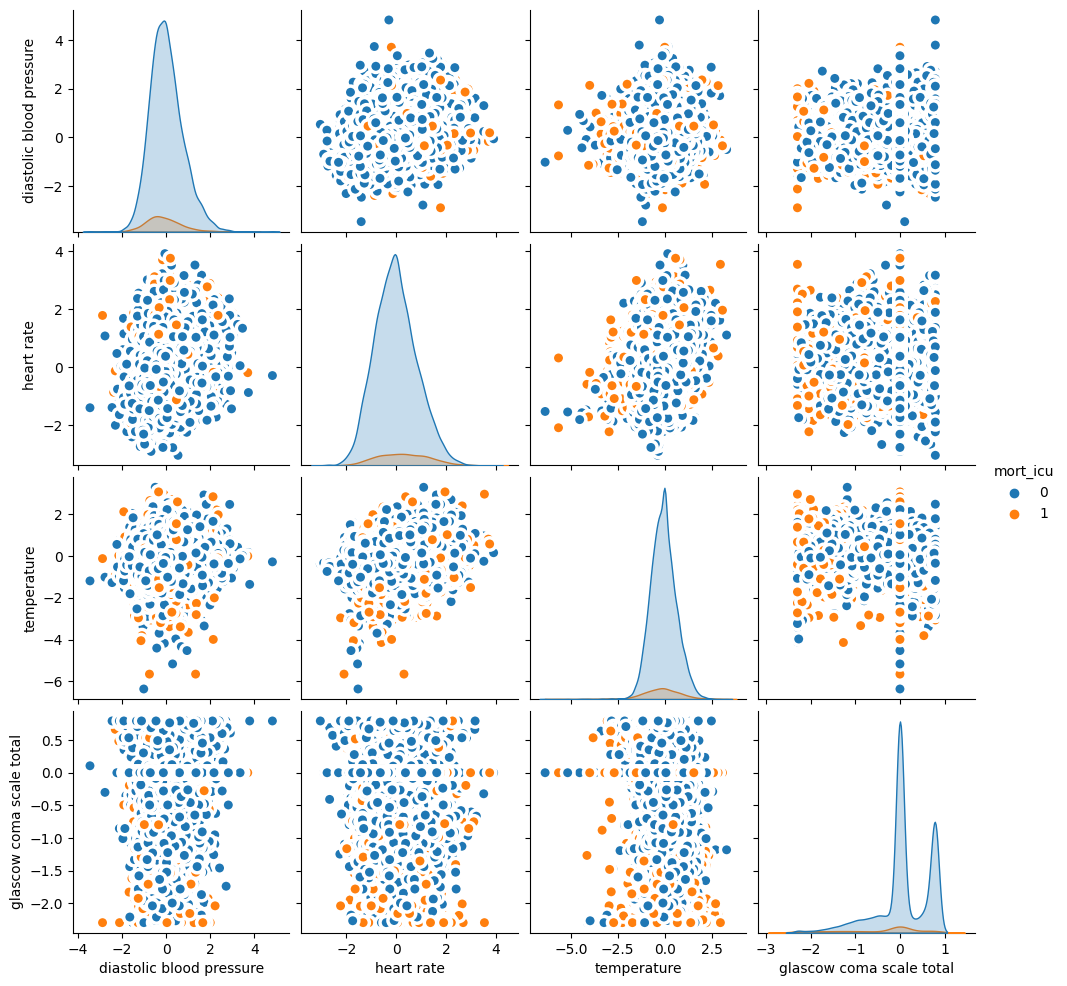

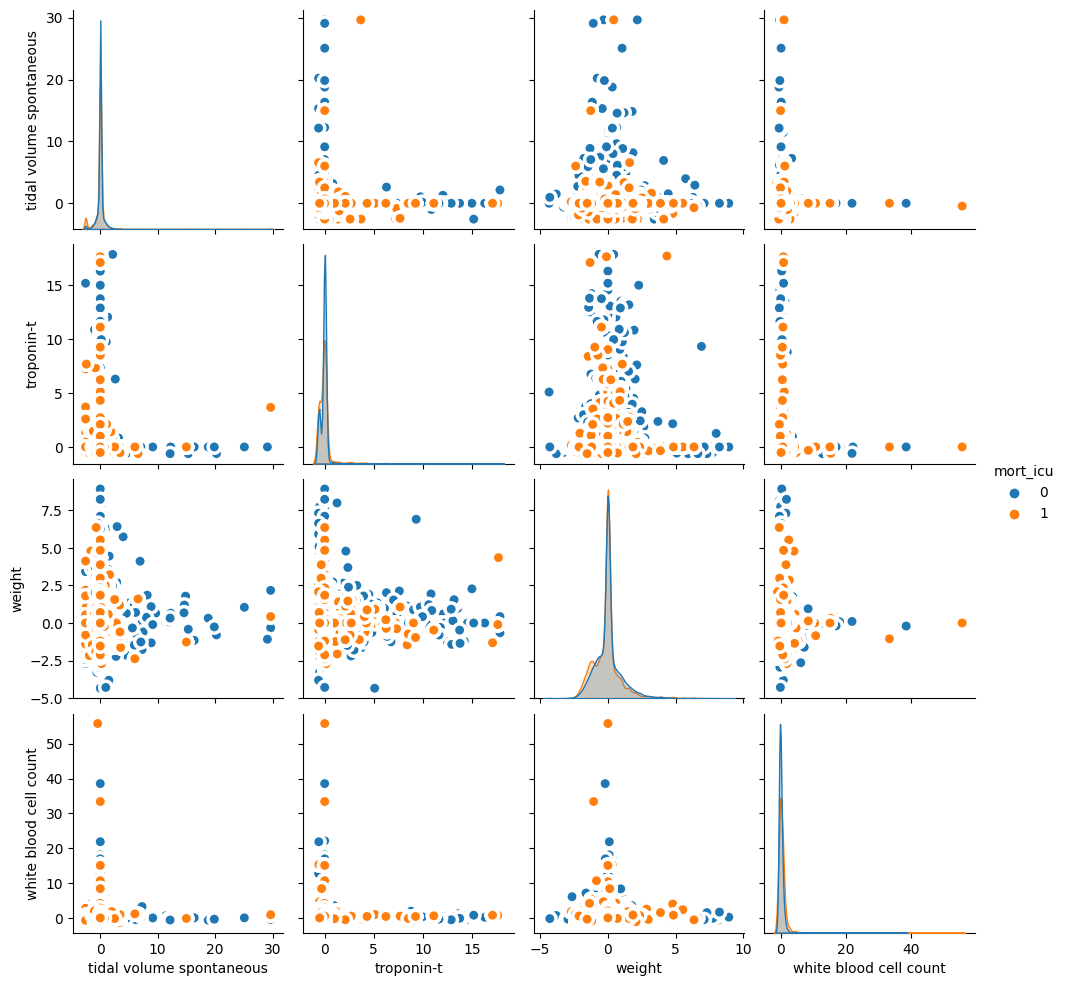

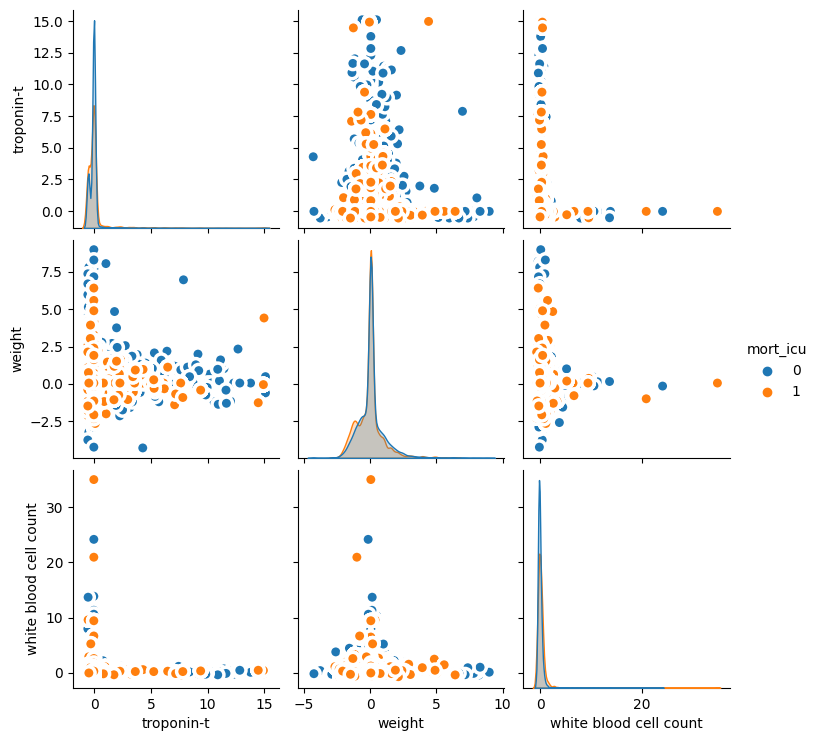

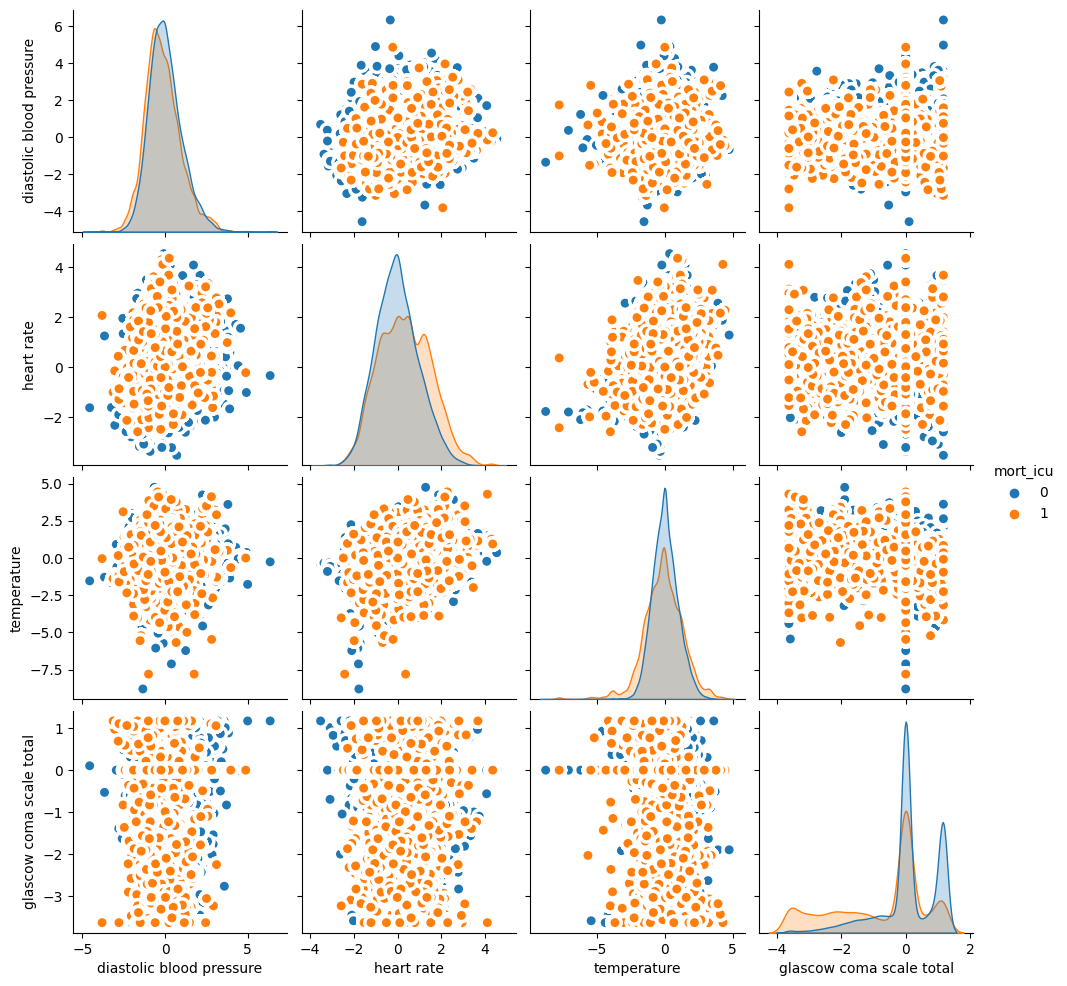

In [12]:
%run Data_preprocessing_realmean_forrun_final_task1.py

## GridsearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    'C'       : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 50,1e8]
}


In [27]:
logreg = LogisticRegression(penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial')
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring="roc_auc",        # metric for scoring
                   cv=10)                     # number of folds

In [29]:
clf.fit(X_train_selected_t1_norm,y_train_t1_balanced)

GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', random_state=0,
                                          solver='saga'),
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                               0.9, 1.0, 10, 20, 50, 100000000.0],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1.0]},
             scoring='roc_auc')

In [30]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.05, 'l1_ratio': 0.1}
Accuracy : 0.8519818825356493


In [38]:
clf1 = LogisticRegression(C=0.05, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.1).fit(X_train_selected_t1_norm,y_train_t1_balanced)
y_pred_1=clf1.predict(X_valid_selected_t1_norm)

## Conventional parameter selection

In [ ]:
# Find most suitable index that can make the model perform best
l1_ratio_list=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

auc of  0.1  :  0.82597595494656
auc of  0.2  :  0.82597595494656
auc of  0.3  :  0.82597595494656
auc of  0.4  :  0.82597595494656
auc of  0.5  :  0.82597595494656
auc of  0.6  :  0.82597595494656
auc of  0.7  :  0.82597595494656
auc of  0.8  :  0.82597595494656
auc of  0.9  :  0.82597595494656
auc of  1.0  :  0.82597595494656


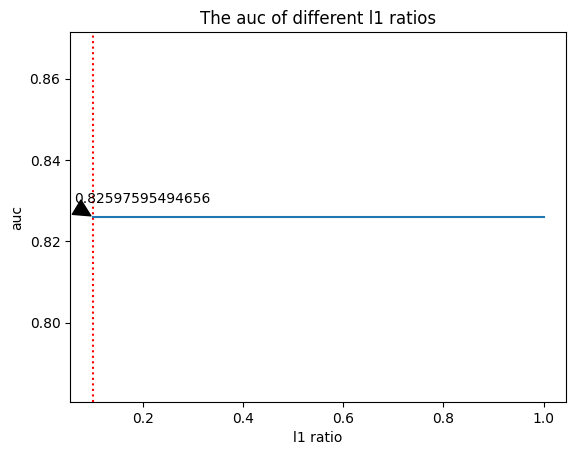

In [32]:
# train the logistic model with different l1 ratio
auc_list2=[]
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=1e8, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_selected_t1_norm,y_train_t1_balanced)
    y_valid_score=clf.decision_function( X_valid_selected_t1_norm)
    # compute ROC curve and AUC for each learning rate
    fpr, tpr, thresholds = roc_curve(y_valid_t1_balanced,y_valid_score)
    roc_auc = auc(fpr, tpr)
    auc_list2.append(roc_auc)
    print("auc of ", l1_ratio ," : ", roc_auc)

max_auc=max(auc_list2)
index= auc_list2.index(max_auc)
loc=l1_ratio_list[index]
plt.title("The auc of different l1 ratios")
plt.xlabel("l1 ratio")
plt.ylabel("auc")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_auc, (loc, max_auc), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(l1_ratio_list, auc_list2)
#find best l1-ratio: 0.6

Output the result

In [40]:
clf2 = LogisticRegression(C=1e8, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.6).fit(X_train_selected_t1_norm,y_train_t1_balanced)
y_pred_2=clf2.predict(X_valid_selected_t1_norm)

In [113]:

pd.DataFrame(y_pred_1).to_excel(excel_writer=r"C:\Users\gcq20\Desktop\STAT3612\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project-\realmean+imbalanced1.xlsx")

Model performance

In [36]:
print(clf1.score(X_valid_selected_t1_norm, y_valid_t1_balanced))
print(clf2.score(X_valid_selected_t1_norm, y_valid_t1_balanced))

0.7406333630686887
0.7404103479036575


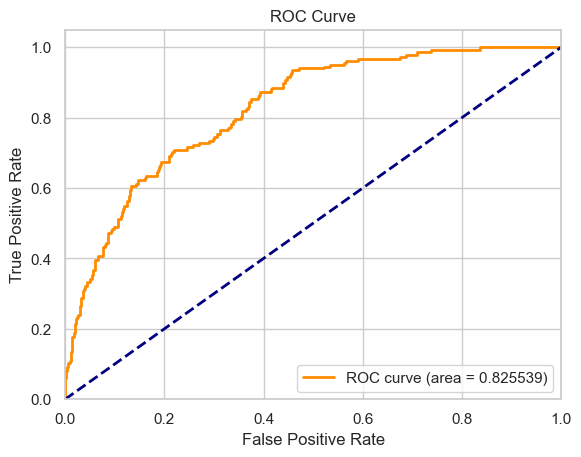

In [39]:
cm=confusion_matrix(y_valid_t1_balanced, y_pred_1)
y_valid_score=clf1.decision_function(X_valid_selected_t1_norm)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_balanced,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

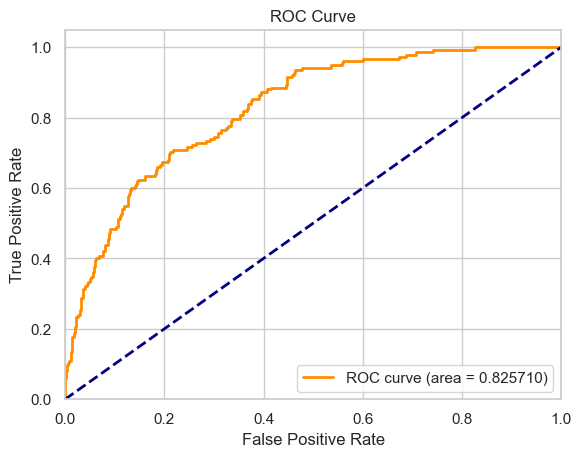

In [42]:
cm=confusion_matrix(y_valid_t1_balanced, y_pred_2)
y_valid_score2=clf2.decision_function(X_valid_selected_t1_norm)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_balanced,y_valid_score2)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")